In [8]:
import os
import sys
import pandas as pd
from os.path import expanduser


#!{sys.executable} -m pip install git+https://gitlab.sd2e.org/sd2program/test-harness.git@add-sparse-col-code-for-untested-data
        
from  pysd2cat.analysis import od_predictor

%load_ext autoreload
%autoreload 2
%reload_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [94]:
df1 = pd.read_csv(os.path.join(os.getcwd(), '../resources/tx_od.csv'), index_col=0)
df1.loc[:, 'inc_time_2'] = df1.apply(lambda x: float(x['inc_time_2'].split(":")[0]), axis=1)
df1

,SynBioHub URI,Unnamed: 0.1,calibration_id,experiment_id,filename,glycerol_plate_index,glycerol_stock,growth_media_1,growth_media_2,id,inc_temp,inc_time_1,inc_time_2,input,lab,lab_id,media,od,od_cutoff,output,part_1_id,part_2_id,plate_id,post_gfp_raw,post_od_corrected,post_od_raw,post_well,pre_gfp_raw,pre_od_corrected,pre_od_raw,pre_well,replicate,source_container,strain,strain_circuit,well
0,https://hub.sd2e.org/user/sd2e/design/UWBF_7375/1,0.0,r1c5yc37m8qs2,11_8_2018_1,/work/05202/dbryce/xplan-reactor/fcs/YeastGates-11-15-2018-Run4_Sytox-YeastGates_SytoxYG-Plate_A1.fcs,11.0,08-30-2018-2,standard_media,standard_media,11_8_2018_1_3_A1,warm_30,16:hour,16.0,1,transcriptic,r1c5vaeb8vbt9_r1c66mfpj7guh,standard_media,0.000300,0.1,0.0,r1c5vaeb8vbt9,r1c66mfpj7guh,3.0,38609.608564,3.568378,1.051520,a1,40024.111611,4.556093,1.342577,a3,0.0,ct1bvwmbhusgjg,https://hub.sd2e.org/user/sd2e/design/UWBF_7375/1,AND,a1
1,https://hub.sd2e.org/user/sd2e/design/UWBF_7300/1,1.0,r1c5yc37m8qs2,11_8_2018_1,/work/05202/dbryce/xplan-reactor/fcs/YeastGates-11-15-2018-Run4_Sytox-YeastGates_SytoxYG-Plate_B1.fcs,11.0,08-30-2018-2,standard_media,standard_media,11_8_2018_1_3_B1,warm_30,16:hour,16.0,0,transcriptic,r1c5vaeb8vbt9_r1c66mfpj7guh,standard_media,0.000300,0.1,1.0,r1c5vaeb8vbt9,r1c66mfpj7guh,3.0,37298.042023,1.414785,0.416905,b1,39829.311835,4.982175,1.468134,e8,0.0,ct1bvwmbhusgjg,https://hub.sd2e.org/user/sd2e/design/UWBF_7300/1,XNOR,b1
2,https://hub.sd2e.org/user/sd2e/design/UWBF_7375/1,2.0,r1c5yc37m8qs2,11_8_2018_1,/work/05202/dbryce/xplan-reactor/fcs/YeastGates-11-15-2018-Run4_Sytox-YeastGates_SytoxYG-Plate_C1.fcs,11.0,08-30-2018-2,standard_media,standard_media,11_8_2018_1_3_C1,warm_30,16:hour,16.0,1,transcriptic,r1c5vaeb8vbt9_r1c66mfpj7guh,standard_media,0.000750,0.1,0.0,r1c5vaeb8vbt9,r1c66mfpj7guh,3.0,39886.498815,4.650828,1.370494,c1,40024.111611,4.556093,1.342577,a3,0.0,ct1bvwmbhusgjg,https://hub.sd2e.org/user/sd2e/design/UWBF_7375/1,AND,c1
3,https://hub.sd2e.org/user/sd2e/design/UWBF_16969/1,3.0,r1c5yc37m8qs2,11_8_2018_1,/work/05202/dbryce/xplan-reactor/fcs/YeastGates-11-15-2018-Run4_Sytox-YeastGates_SytoxYG-Plate_D1.fcs,11.0,08-30-2018-2,standard_media,standard_media,11_8_2018_1_3_D1,warm_30,16:hour,16.0,1,transcriptic,r1c5vaeb8vbt9_r1c66mfpj7guh,standard_media,0.000750,0.1,1.0,r1c5vaeb8vbt9,r1c66mfpj7guh,3.0,37675.399501,2.494735,0.735142,d1,37890.338105,3.335819,0.982990,d7,0.0,ct1bvwmbhusgjg,https://hub.sd2e.org/user/sd2e/design/UWBF_16969/1,XOR,d1
4,https://hub.sd2e.org/user/sd2e/design/UWBF_16967/1,4.0,r1c5yc37m8qs2,11_8_2018_1,/work/05202/dbryce/xplan-reactor/fcs/YeastGates-11-15-2018-Run4_Sytox-YeastGates_SytoxYG-Plate_E1.fcs,11.0,08-30-2018-2,standard_media,standard_media,11_8_2018_1_3_E1,warm_30,16:hour,16.0,11,transcriptic,r1c5vaeb8vbt9_r1c66mfpj7guh,standard_media,0.000300,0.1,0.0,r1c5vaeb8vbt9,r1c66mfpj7guh,3.0,39326.071961,3.918860,1.154799,e1,40845.469102,5.142327,1.515328,b8,0.0,ct1bvwmbhusgjg,https://hub.sd2e.org/user/sd2e/design/UWBF_16967/1,XOR,e1
5,https://hub.sd2e.org/user/sd2e/design/UWBF_7373/1,5.0,r1c5yc37m8qs2,11_8_2018_1,/work/05202/dbryce/xplan-reactor/fcs/YeastGates-11-15-2018-Run4_Sytox-YeastGates_SytoxYG-Plate_F1.fcs,11.0,08-30-2018-2,standard_media,standard_media,11_8_2018_1_3_F1,warm_30,16:hour,16.0,10,transcriptic,r1c5vaeb8vbt9_r1c66mfpj7guh,standard_media,0.000300,0.1,0.0,r1c5vaeb8vbt9,r1c66mfpj7guh,3.0,37672.277802,2.659247,0.783620,f1,40162.160129,4.666875,1.375223,c3,0.0,ct1bvwmbhusgjg,https://hub.sd2e.org/user/sd2e/design/UWBF_7373/1,AND,f1
6,https://hub.sd2e.org/user/sd2e/design/UWBF_16968/1,6.0,r1c5yc37m8qs2,11_8_2018_1,/work/05202/dbryce/xplan-reactor/fcs/YeastGates-11-15-2018-Run4_Sytox-YeastGates_SytoxYG-Plate_G1.fcs,11.0,08-30-2018-2,standard_media,standard_media,11_8_2018_1_3_G1,warm_30,16:hour,16.0,10,transcriptic,r1c5vaeb8vbt9_r1c66mfpj7guh,standard_media,0.000750,0.1,1.0,r1c5vaeb8vbt9,r1c66mfpj7guh,3.0,39718.756729,4.994909,1.471887,g1,40516.098534,4.833329,1.424273,a8,0.0,ct1bvwmbhusgjg,https:/

In [108]:
dfp = df1.loc[(df1['growth_media_1'] == 'standard_media') & (df1['inc_time_2'] == 12) & (df1['inc_temp'] == 'warm_30')]
dft = df1.loc[(df1['growth_media_1'] == 'standard_media') & (df1['inc_time_2'] != 12) & (df1['inc_temp'] == 'warm_30')]

In [19]:
df['growth_media_1'].unique()

array(['standard_media'], dtype=object)

In [109]:
predictions = od_predictor.predict(dft, dfp)

/Users/danbryce/xplan/lib/python3.6/site-packages/pandas/core/generic.py:5434: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 11:45:36
Normalizing training and testing splits...
{'08-30-2018-2', '08-30-2018-1', '02-05-2019-1'}
{'08-30-2018-2', '08-30-2018-1', '02-05-2019-1'}
{'02-05-2019-1'}
{'08-30-2018-2', '08-30-2018-1', '02-05-2019-1'}
{'standard_media'}
{'standard_media'}
{'standard_media'}
{'standard_media'}
{'standard_media'}
{'standard_media'}
{'standard_media'}
{'standard_media'}
{'warm_30'}
{'warm_30'}
{'warm_30'}
{'warm_30'}
{'18:hour', '16:hour'}
{'18:hour', '16:hour'}
{'18:hour'}
{'18:hour', '16:hour'}
{8.0, 10.0, 15.0, 16.0, 18.0}
{8.0, 10.0, 15.0, 16.0, 18.0}
{12.0}
{8.0, 10.0, 12.0, 15.0, 16.0, 18.0}
{'g10', 'e10', 'f6', 'h7', 'd3', 'c3', 'f11', 'f8', 'a4', 'g9', 'f1', 'h2', 'h4', 'a10', 'g1', 'd4', 'f10', 'a5', 'h11', 'c8', 'c10', 'c1', 'h1', 'a6', 'd10', 'd7', 'c6', 'e1', 'g4', 'a2', 'g6', 'd8', 'a9', 'e7', 'd11', 'e8', 'b2', 'c2', 'a7', 'e2', 'h8', 'c11', 'e4', 'f5', 'b9

Training time was: 1.62 seconds
Testing time was: 0.11 seconds
Prediction time of untested data was: 0.11017584800720215

          Run ID        Date      Time Model Name Model Author  R-Squared   RMSE Samples In Train Samples In Test                                                                                                                     Model Description Column Predicted Num Features Used Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  EWxbedk9XOw8e  2019-06-24  11:45:36  __init__   Hamed        0.152      0.001  2956             740             Random Forest: bootstrap=False, min_samples_leaf=1, n_estimators=689, min_samples_split=2, max_features=0.2, max_depth=86, n_jobs=-1  od               198               OD Prediction              True       4                       False              True                      

Run finished at 11:45:39. Total run time = 2.30 seconds
▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲

In [113]:
import math

target = 0.5

predictions['distance'] = predictions.apply(lambda x: abs(x['post_od_raw'] - target), axis=1)
#predictions.sort_values(['distance'])


In [114]:
#selections = predictions.groupby(['strain']).agg({'distance' : [min], 
#                                                  'od_predictions' : ['first']})  
#selections = selections.reset_index()
selections = predictions.loc[predictions.groupby('SynBioHub URI')['distance'].idxmin()]
#selections.columns = ['_'.join(col).strip() for col in selections.columns.values]
#selections = selections.drop(columns=['distance_min']).rename(columns={'od_predictions_first' : 'od'}).reset_index()
selections.to_csv('strain_inoculation_od.csv')
selections.set_index('SynBioHub URI').to_dict()['od_predictions']
#selections


{'https://hub.sd2e.org/user/sd2e/design/UWBF_16967/1': 0.002108112268625868,
 'https://hub.sd2e.org/user/sd2e/design/UWBF_16968/1': 0.0006187647324820343,
 'https://hub.sd2e.org/user/sd2e/design/UWBF_16969/1': 0.0007444229783393113,
 'https://hub.sd2e.org/user/sd2e/design/UWBF_16970/1': 0.0006676857082389263,
 'https://hub.sd2e.org/user/sd2e/design/UWBF_5783/1': 0.0002220883406087597,
 'https://hub.sd2e.org/user/sd2e/design/UWBF_5992/1': 0.000814242879317788,
 'https://hub.sd2e.org/user/sd2e/design/UWBF_5993/1': 0.00036346104552720514,
 'https://hub.sd2e.org/user/sd2e/design/UWBF_6388/1': 0.0007654596461049117,
 'https://hub.sd2e.org/user/sd2e/design/UWBF_6389/1': 0.0008780352578605942,
 'https://hub.sd2e.org/user/sd2e/design/UWBF_6390/1': 0.0008932377787112629,
 'https://hub.sd2e.org/user/sd2e/design/UWBF_6391/1': 0.0011425351933984807,
 'https://hub.sd2e.org/user/sd2e/design/UWBF_7299/1': 0.0006317455327154804,
 'https://hub.sd2e.org/user/sd2e/design/UWBF_7300/1': 0.00054526784321962

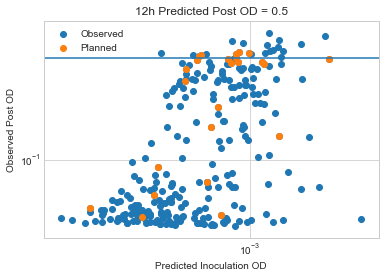

In [115]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np
plt.xscale('log')
plt.yscale('log')
plt.axhline(target)
plt.xlabel("Predicted Inoculation OD")
plt.ylabel("Observed Post OD")
plt.title("12h Predicted Post OD = " + str(target))
plt.scatter(predictions['od_predictions'], predictions['post_od_raw'], label='Observed');
plt.scatter(selections['od_predictions'], selections['post_od_raw'], label='Planned');
plt.legend()